In [ ]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip install plotly express

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [234]:
df = pd.read_csv('/home/jp/Documents/ssl-unification/bin/output.csv', header= None)

In [231]:
df.head()

,0,1,2
0,-3154.72,-28.3226,3.67243
1,-3082.46,-7.9504,5.47362
2,-3082.46,-7.9504,5.40610
3,-2850.08,33.7831,7.13220
4,-2850.08,33.7831,7.13220


In [235]:
test = df.iloc[0]
df.drop(0, axis=0, inplace= True)


In [345]:
for i in df.index:
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124


In [3]:
def getModule(x,y):
    return np.sqrt(x**2 + y**2)

In [4]:
def getDf(df, first):
    dfplot = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(len(df)):
        x = df.iloc[i][0] - first[0]
        y = df.iloc[i][1] - first[1]
        v = df.iloc[i][2] 
        module = getModule(x,y)
        dfplot.loc[i] = [module, v]
    return dfplot

In [236]:
dfplot = getDf(df, test)

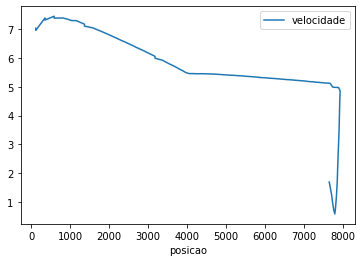

In [237]:
dfplot.plot(x = 'posicao',y = 'velocidade', kind = 'line')
plt.show()

In [115]:
df = pd.read_csv('/home/jp/Documents/ssl-unification/bin/csv/4.csv', header= None)
df = getDftoIntercept(df)
#df.drop_duplicates(subset=['posicao'], keep='first', inplace=True)
fig = px.line(df,x='posicao',y='velocidade')
fig.show()

In [99]:
print(df.iloc[int(len(df)/15)])

posicao       903.912335
velocidade      4.024470
Name: 17, dtype: float64


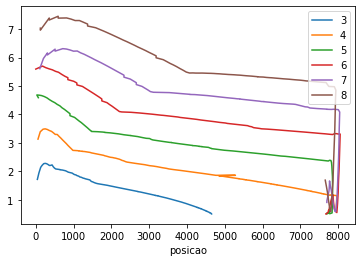

In [5]:
dataframes = []
firsts = []
ax = plt.subplot()
for i in range(3,9):
    dataframes.append(pd.read_csv('/home/jp/Documents/ssl-unification/bin/csv/'+str(i)+'.csv', header= None))
    firsts.append(dataframes[len(dataframes)-1].iloc[0])
    dataframes[len(dataframes)-1].drop(0, axis=0, inplace= True)
    dataframes[len(dataframes)-1] = getDf(dataframes[len(dataframes)-1], firsts[len(firsts)-1])
    ax = dataframes[len(dataframes)-1].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line', label = str(i))


In [111]:
def getDftoIntercept(dfregressao):
    dfregressao1 = pd.DataFrame(columns=['posicao', 'velocidade'])
    start = dfregressao.iloc[0]
    dfregressao.drop(0, axis=0, inplace= True)
    dfregressao1 = getDf(dfregressao, start)
    max = dfregressao1.max(axis=0)[1]
    index = dfregressao1[dfregressao1['velocidade'] == max].index[0]
    dfregressao1 = dfregressao1.iloc[index:]
    return dfregressao1.drop_duplicates(subset=['posicao'], keep='first', inplace=False)
    

In [7]:
def getA(x,y,x2,y2):
    return (y2-y)/(x2-x)
def getB(a,x,y):
    return y - a*x
def reta(a,b,x):
    return a*x + b

In [8]:
def getRegressao(a, b, r):
    dfreta = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(r):
        y = reta(a,b,i)
        dfreta.loc[i] = [i, y]
    return dfreta


In [9]:
def getInterception(a,b,a1,b1):
    x = (b-b1)/(a1-a)
    y = reta(a,b,x)
    return(x,y)

In [113]:
dataframes = []
dfprecision = []
retas1 = []
retas2 = []
interceptions = []
for i in range(3,9):
    dataframes.append(pd.read_csv('/home/jp/Documents/ssl-unification/bin/csv/'+str(i)+'.csv', header= None))
    dfprecision.append(getDftoIntercept(dataframes[len(dataframes)-1]))
for i in dfprecision:
    a1 = getA(i.iloc[int(len(i)/20)]['posicao'], i.iloc[int(len(i)/20)]['velocidade'], i.iloc[int(len(i)/15)]['posicao'], i.iloc[int(len(i)/15)]['velocidade'])
    b1 = getB(a1, i.iloc[22]['posicao'], i.iloc[22]['velocidade'])
    retas1.append(getRegressao(a1, b1, 5000))
    a2 = getA(i.iloc[int(2*len(i)/4)]['posicao'], i.iloc[int(2*len(i)/4)]['velocidade'], i.iloc[int(3*len(i)/4)]['posicao'], i.iloc[int(3*len(i)/4)]['velocidade'])
    b2 = getB(a2, i.iloc[int(2*len(i)/4)]['posicao'], i.iloc[int(2*len(i)/4)]['velocidade'])
    retas2.append(getRegressao(a2, b2, 8000))
    interceptions.append(getInterception(a1,b1,a2,b2))

In [117]:
print(interceptions[2])

(1775.995634470622, 3.166548372077277)


<AxesSubplot:xlabel='posicao'>

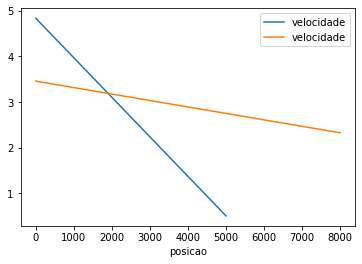

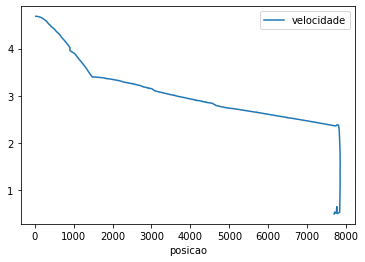

In [31]:
ax = retas1[2].plot(x = 'posicao',y = 'velocidade', kind = 'line')
retas2[2].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')
dfprecision[2].plot(x = 'posicao',y = 'velocidade', kind = 'line')


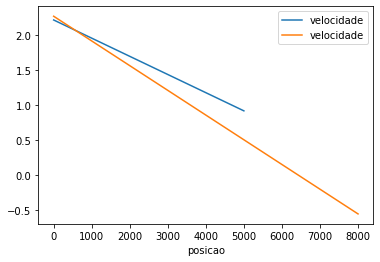

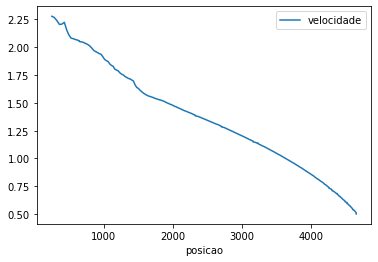

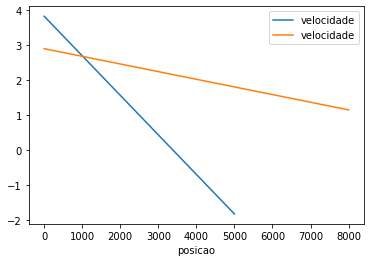

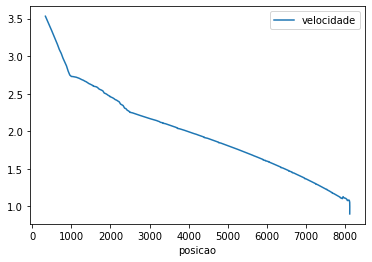

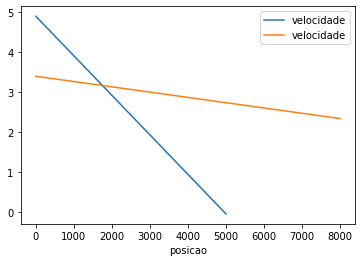

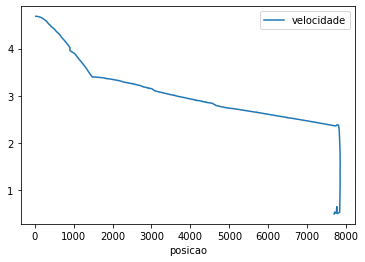

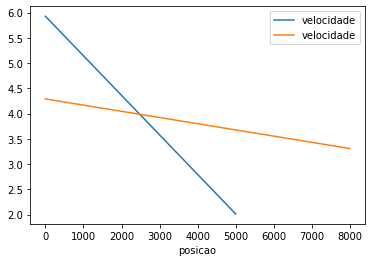

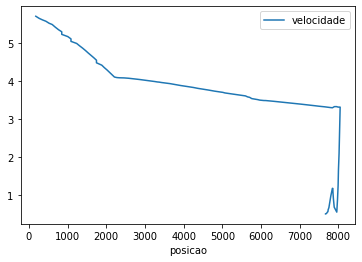

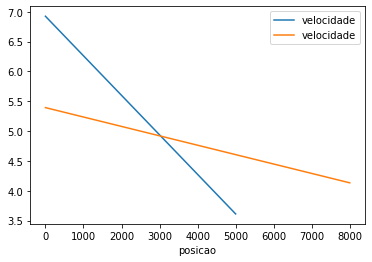

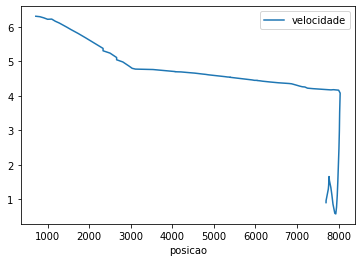

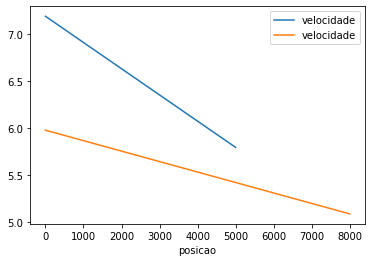

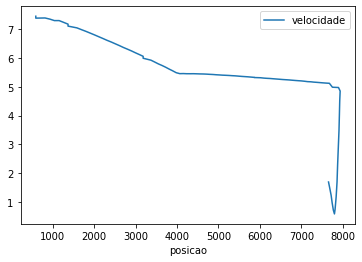

In [101]:
for i in range(len(retas1)):
    ax = retas1[i].plot(x = 'posicao',y = 'velocidade', kind = 'line')
    retas2[i].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')
    dfprecision[i].plot(x = 'posicao',y = 'velocidade', kind = 'line')